In [2]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
warnings.filterwarnings('ignore')

#PATH dove andare a leggere e a scrivere
PATH_TO_WRITE_ETL = "./dataset_modificato_WC/"
PATH_FROM_READ_ETL = "./dataset_originale_WC/"
PATH_FROM_READ_ANALYSIS = "./dataset_modificato_WC/" 

In [32]:
cluster_0 = pd.read_csv("./clusters/clusters_players/0.csv")
cluster_1 = pd.read_csv("./clusters/clusters_players/1.csv")
cluster_2 = pd.read_csv("./clusters/clusters_players/2.csv")
cluster_3 = pd.read_csv("./clusters/clusters_players/3.csv")
cluster_4 = pd.read_csv("./clusters/clusters_players/4.csv")
cluster_5 = pd.read_csv("./clusters/clusters_players/5.csv")
cluster_6 = pd.read_csv("./clusters/clusters_players/6.csv")


In [17]:
def get_roles_perc(cluster,i):
    print("CLUSTER",str(i))
    df_players = pd.read_csv(PATH_FROM_READ_ANALYSIS+"players.csv")
    merge = cluster.merge(df_players,how="left",on="player_id")
    merge_gk = merge[merge.goal_keeper == 1]
    print("portieri",len(merge_gk)*100/len(cluster))
    merge_df = merge[merge.defender == 1]
    print("difensori",len(merge_df)*100/len(cluster))
    merge_md = merge[merge.midfielder == 1]
    print("centrocampisti",len(merge_md)*100/len(cluster))
    merge_fw = merge[merge.forward == 1]
    print("attaccanti",len(merge_fw)*100/len(cluster))

In [19]:
get_roles_perc(cluster_0,0)
get_roles_perc(cluster_1,1)
get_roles_perc(cluster_2,2)
get_roles_perc(cluster_3,3)


CLUSTER 0
portieri 7.08955223880597
difensori 32.08955223880597
centrocampisti 32.486007462686565
attaccanti 28.754664179104477
CLUSTER 1
portieri 10.204081632653061
difensori 35.374149659863946
centrocampisti 36.054421768707485
attaccanti 27.891156462585034
CLUSTER 2
portieri 12.258064516129032
difensori 35.483870967741936
centrocampisti 41.29032258064516
attaccanti 24.838709677419356
CLUSTER 3
portieri 7.868852459016393
difensori 34.09836065573771
centrocampisti 30.81967213114754
attaccanti 29.83606557377049


In [20]:
get_roles_perc(cluster_4,4)
get_roles_perc(cluster_5,5)
get_roles_perc(cluster_6,6)

CLUSTER 4
portieri 0.0
difensori 10.9375
centrocampisti 39.0625
attaccanti 56.25
CLUSTER 5
portieri 7.613636363636363
difensori 35.0
centrocampisti 37.61363636363637
attaccanti 30.0
CLUSTER 6
portieri 0.0
difensori 11.11111111111111
centrocampisti 33.333333333333336
attaccanti 74.07407407407408


In [21]:
cluster_2.describe()

,total_games_played,n_minutes_played,n_tournaments,n_tournaments_played,total_final_match_played,n_wc_wins,total_goals,total_penalty_scored,Segm K-means PCA
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.0
mean,10.180645,846.393548,2.809677,2.674194,0.177419,0.032258,1.070968,0.006452,2.0
std,2.357858,246.941472,0.612097,0.596900,0.382641,0.176970,1.564616,0.080192,0.0
min,5.000000,149.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,9.000000,680.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,10.000000,840.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,11.000000,990.000000,3.000000,3.000000,0.000000,0.000000,1.750000,0.000000,2.0
max,21.000000,1808.000000,5.000000,5.000000,1.000000,1.000000,10.000000,1.000000,2.0


In [47]:
cluster_3.describe()

,total_games_played,n_minutes_played,n_tournaments,n_tournaments_played,total_final_match_played,n_wc_wins,total_goals,total_penalty_scored,Segm K-means PCA
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0
mean,4.114754,330.672131,1.291803,1.134426,0.632787,0.695082,0.501639,0.003279,3.0
std,2.044717,200.792355,0.535053,0.341670,0.489603,0.475182,1.057942,0.057260,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,2.000000,145.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,4.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.0
75%,6.000000,480.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.0
max,9.000000,840.000000,4.000000,2.000000,2.000000,2.000000,6.000000,1.000000,3.0


In [46]:
df_substitution = pd.read_csv(PATH_FROM_READ_ANALYSIS + "substitutions.csv")
print(df_substitution.columns)

df_substitution[["player_id","going_off","coming_on"]]
df_substitution_2 = df_substitution.groupby(["player_id"])\
                                            [['going_off','coming_on']]\
                                            .agg('sum')\
                                            .reset_index()
df_substitution_2

m = cluster_3.merge(df_substitution_2,how="left",on="player_id")
print(len(m[m.going_off>0])/len(m))
print(len(m[m.coming_on>0])/len(m))


Index(['key_id', 'substitution_id', 'tournament_id', 'tournament_name',
       'match_id', 'match_name', 'match_date', 'stage_name', 'group_name',
       'team_id', 'team_name', 'team_code', 'home_team', 'away_team',
       'player_id', 'family_name', 'given_name', 'shirt_number',
       'minute_label', 'minute_regulation', 'minute_stoppage', 'match_period',
       'going_off', 'coming_on'],
      dtype='object')
0.2360655737704918
0.3016393442622951


Text(0, 0.5, 'Count')

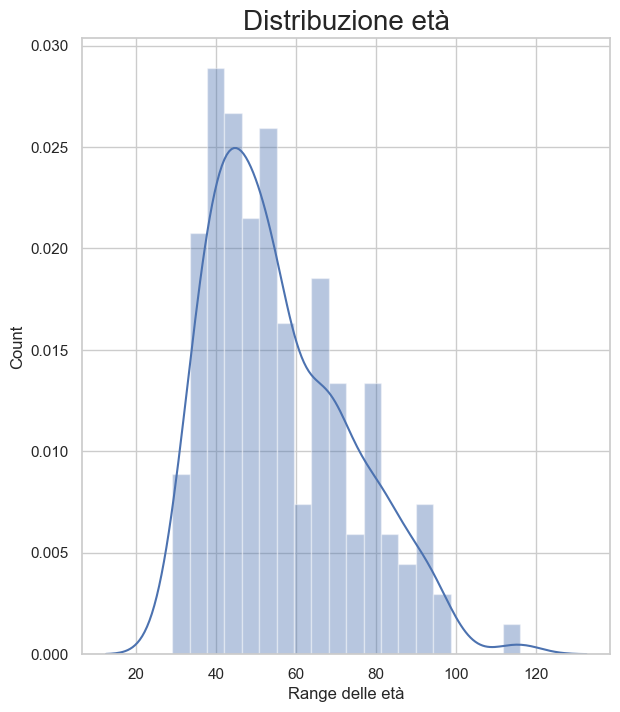

In [54]:
df_players = pd.read_csv(PATH_FROM_READ_ANALYSIS+"players.csv")
merge = cluster_2.merge(df_players,how="left",on="player_id")
merge["birth_date"] = pd.to_datetime(merge["birth_date"])
now = pd.Timestamp('now')
merge['age'] = (now - merge['birth_date']).astype('<m8[Y]')

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(merge['age'], kde=True, bins=20)
plt.title('Distribuzione età', fontsize = 20)
plt.xlabel('Range delle età')
plt.ylabel('Count')

In [56]:
#calcolo età ultimo match 

df_tournaments = pd.read_csv(PATH_FROM_READ_ANALYSIS + "tournaments.csv")
df_players = pd.read_csv(PATH_FROM_READ_ANALYSIS + "players.csv")
df_goals = pd.read_csv(PATH_FROM_READ_ANALYSIS + "goals.csv")
df_player_appearances = pd.read_csv(PATH_FROM_READ_ANALYSIS + "player_appearances.csv")
df_bookings = pd.read_csv(PATH_FROM_READ_ANALYSIS + "bookings.csv")
df_substitution = pd.read_csv(PATH_FROM_READ_ANALYSIS + "substitutions.csv")
df_matches = pd.read_csv(PATH_FROM_READ_ANALYSIS + "matches.csv")
df_squads = pd.read_csv(PATH_FROM_READ_ANALYSIS + "squads.csv")
df_tournament_standings = pd.read_csv(PATH_FROM_READ_ANALYSIS + "tournament_standings.csv")

df_player_appearances = df_player_appearances[["match_id","player_id","match_date"]]
df = df_player_appearances.merge(df_players[["player_id","birth_date"]],on="player_id",how="left")
df[["player_id","birth_date","match_id","player_id","match_date"]]

#df["birth_date"] = pd.to_datetime(df["birth_date"])
#df['age'] = (df["birth_date"] - df['match_date']).astype('<m8[Y]')

print(len(df))


23023


23023
22980
310
305


Text(0, 0.5, 'Count')

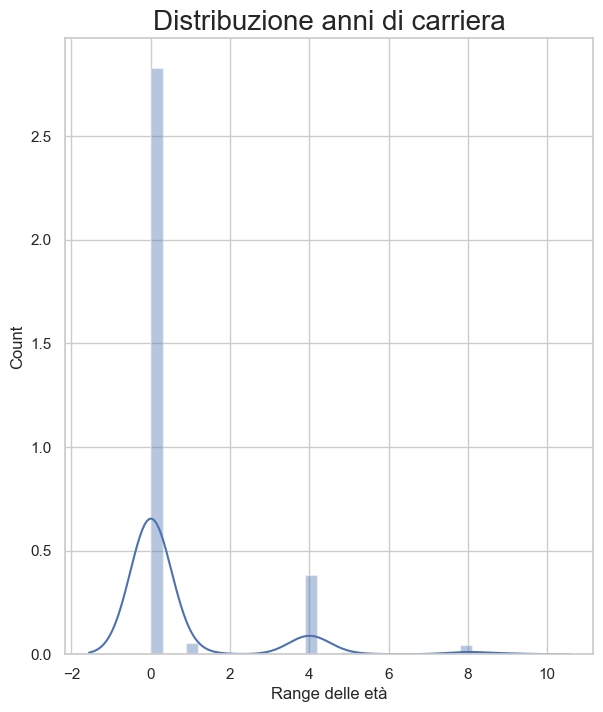

In [69]:
#calcolo età ultimo match 

#Cluster 3: Carriera
df_tournaments = pd.read_csv(PATH_FROM_READ_ANALYSIS + "tournaments.csv")
df_players = pd.read_csv(PATH_FROM_READ_ANALYSIS + "players.csv")
df_goals = pd.read_csv(PATH_FROM_READ_ANALYSIS + "goals.csv")
df_player_appearances = pd.read_csv(PATH_FROM_READ_ANALYSIS + "player_appearances.csv")
df_bookings = pd.read_csv(PATH_FROM_READ_ANALYSIS + "bookings.csv")
df_substitution = pd.read_csv(PATH_FROM_READ_ANALYSIS + "substitutions.csv")
df_matches = pd.read_csv(PATH_FROM_READ_ANALYSIS + "matches.csv")
df_squads = pd.read_csv(PATH_FROM_READ_ANALYSIS + "squads.csv")
df_tournament_standings = pd.read_csv(PATH_FROM_READ_ANALYSIS + "tournament_standings.csv")

df_player_appearances = df_player_appearances[["match_id","player_id","match_date"]]
df = df_player_appearances.merge(df_players[["player_id","birth_date"]],on="player_id",how="left")
df[["player_id","birth_date","match_id","player_id","match_date"]]

#df["birth_date"] = pd.to_datetime(df["birth_date"])
#df['age'] = (df["birth_date"] - df['match_date']).astype('<m8[Y]')

print(len(df))
df = df[df["player_id"]!="P-03300"]
df = df[df["birth_date"]!="not available"]
print(len(df))
df['match_date'] = pd.to_datetime(df['match_date'])
df["birth_date"] = pd.to_datetime(df["birth_date"])
df['age'] = (df['match_date'] - df["birth_date"]).astype('<m8[Y]')
df2 = df.groupby(["player_id"])\
            [['age']]\
            .agg('max')\
            .reset_index()
df2 = df2.rename(columns={"age": "age_max"})
df3 = df.groupby(["player_id"])\
            [['age']]\
            .agg('min')\
            .reset_index()
df3 = df3.rename(columns={"age": "age_min"})
df = df2.merge(df3,on="player_id",how="left")
df["years_career"] =  df["age_max"] - df["age_min"]
print(len(cluster_2))

merge = cluster_3.merge(df,on="player_id",how="left")
print(len(merge))
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(merge['years_career'],bins=30)
plt.title('Distribuzione anni di carriera', fontsize = 20)
plt.xlabel('Range delle età')
plt.ylabel('Count')
